In [ ]:
# importing necessary packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# download the sample images
!wget --no-check-certificate https://drive.google.com/uc?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW -O fruit.png
!wget --no-check-certificate https://drive.google.com/uc?id=1FUAnrbsGjDuPlveBn7ZwAupBe6DakSSb -O wall.png
!wget --no-check-certificate https://drive.google.com/uc?id=1qYzzxJUwcVcrH5ukAezNO9yk0Mp-YZpa -O baboon.png
!wget --no-check-certificate https://drive.google.com/uc?id=1HigA718pt8Hu1XVvhu9d09oUw9I0NrsB -O barbara.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1m4gj60Iv-7NoW_QvUxiY-kEa2CvgL6xk -O cubes.png
!wget --no-check-certificate https://drive.google.com/uc?id=1Zyl_MPJ1xptQjVNeKZgrMZkwss7suOwb -O zebra_ft.png
!wget --no-check-certificate https://drive.google.com/uc?id=1Mk8jEZWzCrMs6WerUW3JKJCpVbVZJYzj -O cheetah.png
!wget --no-check-certificate https://drive.google.com/uc?id=17DNMzfE3Lc6B6ygU7Sf0DxP1VHx7-MNd -O board_with_noies.tif

--2024-10-31 05:27:48--  https://drive.google.com/uc?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW
Resolving drive.google.com (drive.google.com)... 74.125.196.102, 74.125.196.138, 74.125.196.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW [following]
--2024-10-31 05:27:48--  https://drive.usercontent.google.com/download?id=1rz7OfWcmX05Sm6V-yT9CvIXkAx3d7SsW
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137047 (134K) [image/png]
Saving to: ‘fruit.png’

fruit.png           100%[===================>] 133.83K  --.-KB/s    in 0.002s  

2024-10-31 05:27:51 (70.8 MB/s) - ‘fruit.png’ save

# **1. Discrete Fourier Transform**

Image height= 512 px, and width= 512 px and data type: uint8


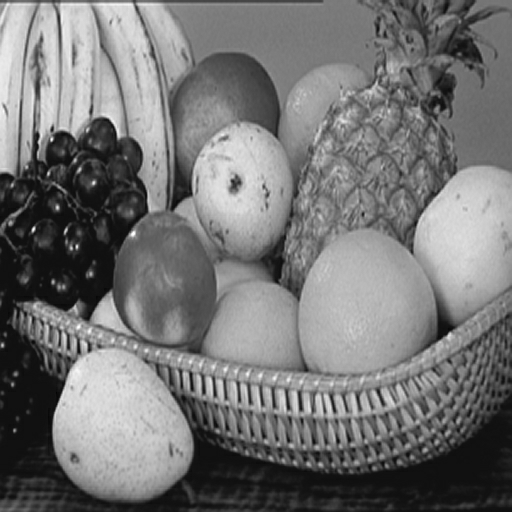

In [ ]:
image=cv2.imread('fruit.png',cv2.IMREAD_GRAYSCALE)
# pring image properties
height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

cv2_imshow(image)

In [ ]:
#1D DFT, manually O(N^2)

input1D = np.linspace(1, 10, 10)
print(input1D," and the mean is ", np.mean(input1D))
output = np.zeros((2,10)) # one row for reals, another for the imaginary parts

N = len(input1D)

for k in range(output.shape[1]):

  for i in range(N):
    # real part
    output[0][k] += input1D[i] * np.cos(2 * np.pi / N * k * i)
    # imaginary part
    output[1][k] += -input1D[i] * np.sin(2 * np.pi / N * k * i)

  output[0][k] *= 1/N
  output[1][k] *= 1/N

  # notice the mean at the first position and the symmetry due to real input
  print("",round(output[0][k],2)," + i * ", round(output[1][k],2))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]  and the mean is  5.5
 5.5  + i *  0.0
 -0.5  + i *  1.54
 -0.5  + i *  0.69
 -0.5  + i *  0.36
 -0.5  + i *  0.16
 -0.5  + i *  -0.0
 -0.5  + i *  -0.16
 -0.5  + i *  -0.36
 -0.5  + i *  -0.69
 -0.5  + i *  -1.54


In [ ]:
# and now the inverse transform
outputInv = np.zeros((2,10)) # one row for reals, another for the imaginary parts

for k in range(N):

  for i in range(N):
    # real part
    outputInv[0][k] += output[0][i] * np.cos(2 * np.pi / N * k * i) - output[1][i] * np.sin(2 * np.pi / N * k * i)

  #output[0][k] *= 1/N
  #output[1][k] *= 1/N

  print(round(outputInv[0][k],2))

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [ ]:
# 2D DFT manually: O(M^2 x N^2)..too long even for 512 x 512
M = image.shape[0]
N = image.shape[1]

output = np.zeros((M,N,2))

# for F[k,l]
for k in range(output.shape[0]):
  for l in range(output.shape[0]):

    # use f(m,n)
    for m in range(M):
      for n in range(N):
        # real part
        output[k][l][0] += image[m][n] * np.cos(2 * np.pi * (k * m / M + l * n / N))
        # imaginary part
        output[k][l][1] += -image[m][n] * np.sin(2 * np.pi * (k * m / M + l * n / N))

  output[k][l][0] *= 1/(M*N)
  output[k][l][1] *= 1/(M*N)

print(output[:,:,0])

<ipython-input-10-90576a8dce13>:17: RuntimeWarning: overflow encountered in scalar negative
  output[k][l][1] += -image[m][n] * np.sin(2 * np.pi * (k * m / M + l * n / N))


# 2. Fourier Transform Visualization

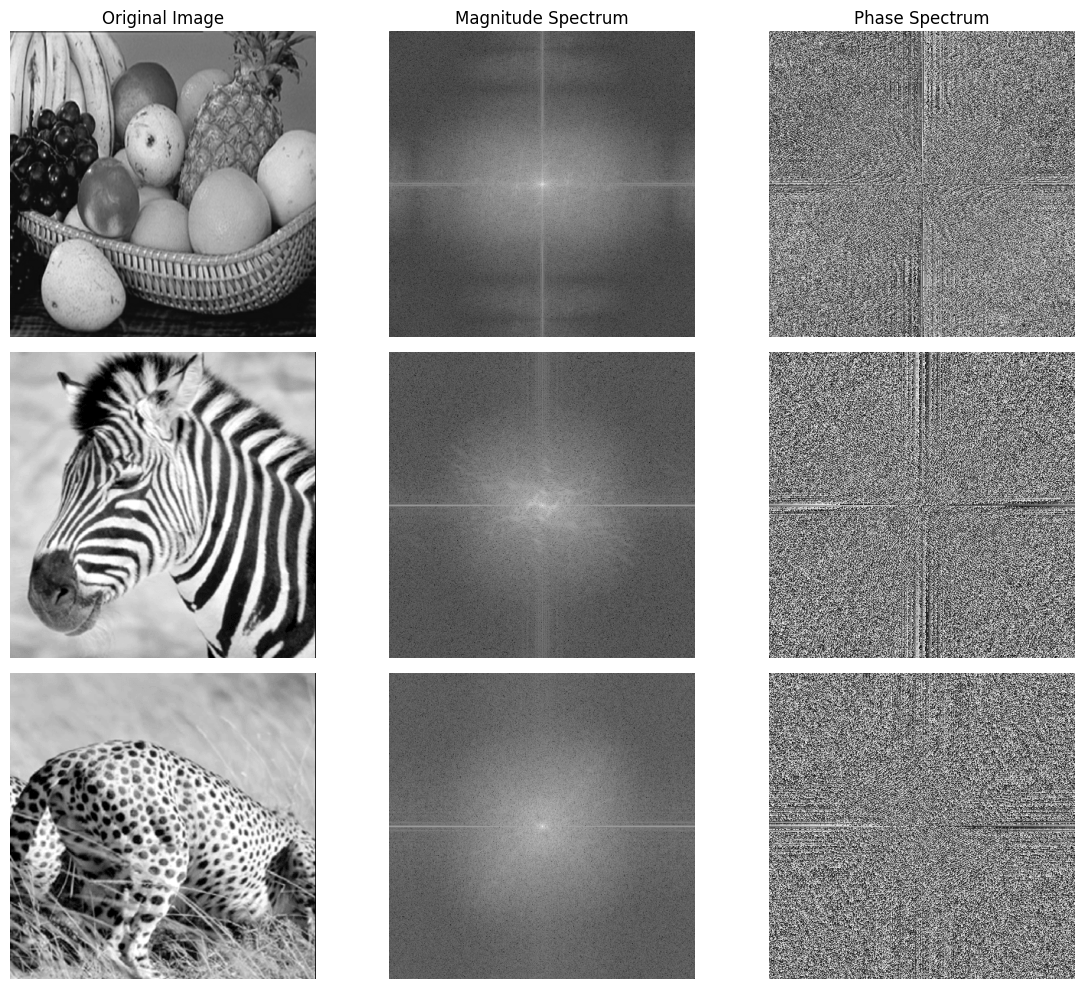

In [ ]:
image_1 = cv2.imread('fruit.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('zebra_ft.png', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('cheetah.png', cv2.IMREAD_GRAYSCALE)

f_transform_1 = np.fft.fft2(image_1)
f_shift_1 = np.fft.fftshift(f_transform_1)
magnitude_spectrum_1 = 20 * np.log(np.abs(f_shift_1) + 1)
phase_spectrum_1 = np.angle(f_shift_1)

f_transform_2 = np.fft.fft2(image_2)
f_shift_2 = np.fft.fftshift(f_transform_2)
magnitude_spectrum_2 = 20 * np.log(np.abs(f_shift_2) + 1)
phase_spectrum_2 = np.angle(f_shift_2)

f_transform_3 = np.fft.fft2(image_3)
f_shift_3 = np.fft.fftshift(f_transform_3)
magnitude_spectrum_3 = 20 * np.log(np.abs(f_shift_3) + 1)
phase_spectrum_3 = np.angle(f_shift_3)


images = [image_1, magnitude_spectrum_1, phase_spectrum_1, image_2, magnitude_spectrum_2, phase_spectrum_2, image_3, magnitude_spectrum_3, phase_spectrum_3]
descriptions = ["Original Image", "Magnitude Spectrum", "Phase Spectrum", "", "", "", "", "", ""]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(descriptions[i])
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

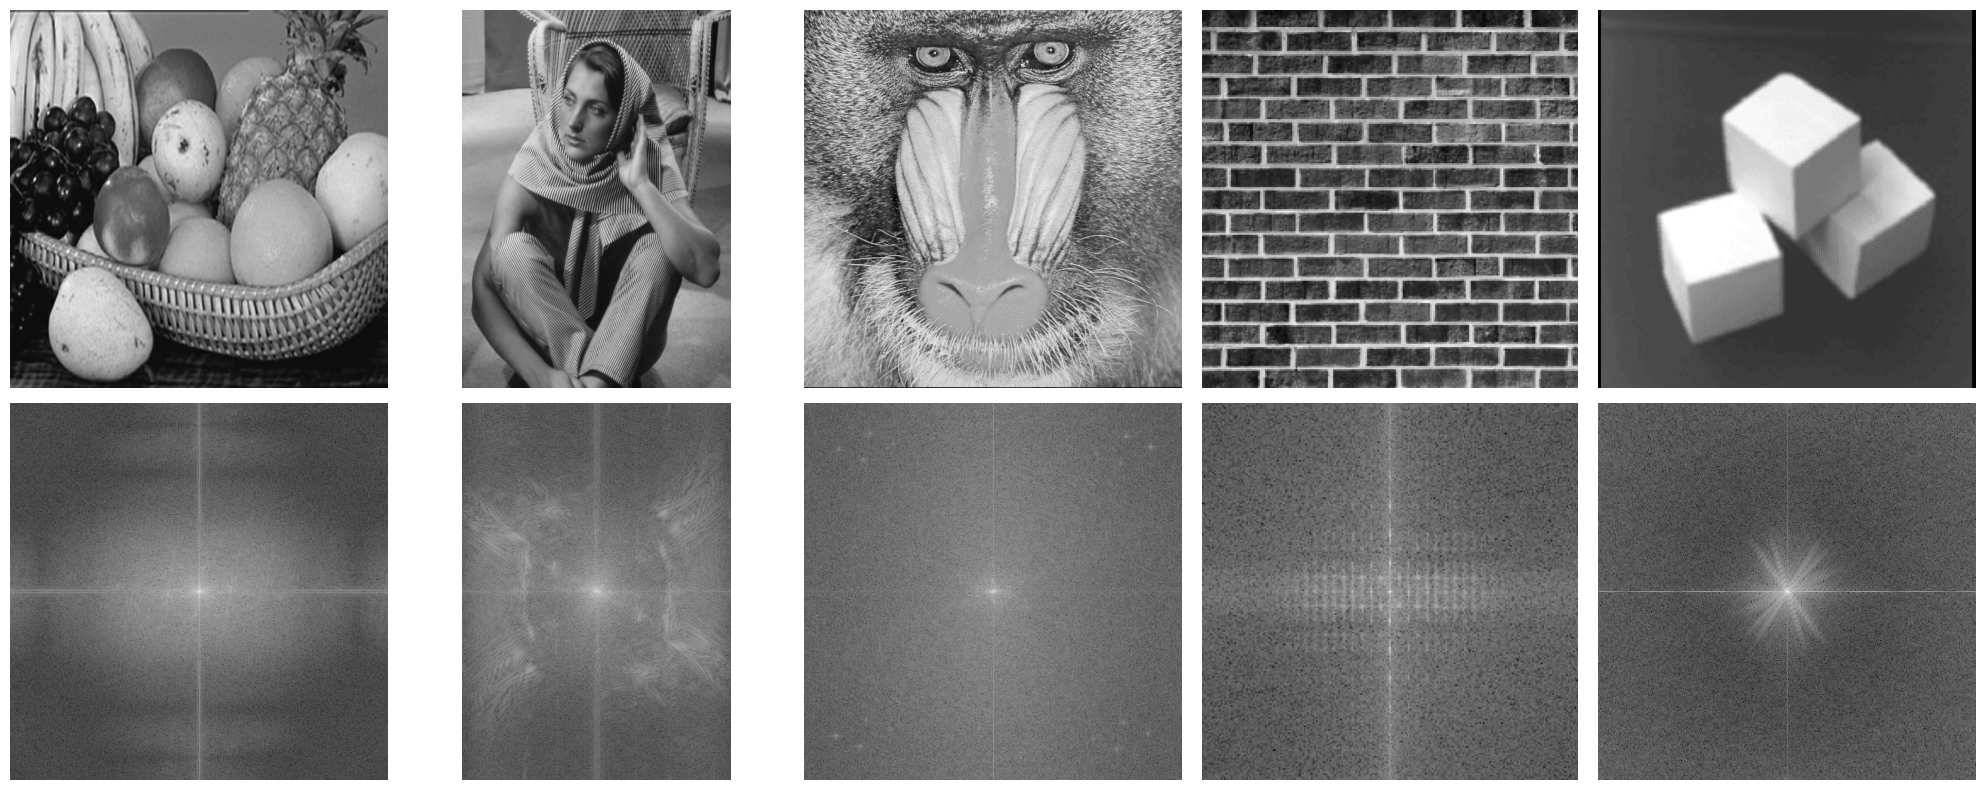

In [ ]:
image_1 = cv2.imread('fruit.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('barbara.tif', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread('wall.png', cv2.IMREAD_GRAYSCALE)
image_5 = cv2.imread('cubes.png', cv2.IMREAD_GRAYSCALE)


f_transform_1 = np.fft.fft2(image_1)
f_shift_1 = np.fft.fftshift(f_transform_1)
magnitude_spectrum_1 = 20 * np.log(np.abs(f_shift_1) + 1)

f_transform_2 = np.fft.fft2(image_2)
f_shift_2 = np.fft.fftshift(f_transform_2)
magnitude_spectrum_2 = 20 * np.log(np.abs(f_shift_2) + 1)

f_transform_3 = np.fft.fft2(image_3)
f_shift_3 = np.fft.fftshift(f_transform_3)
magnitude_spectrum_3 = 20 * np.log(np.abs(f_shift_3) + 1)

f_transform_4 = np.fft.fft2(image_4)
f_shift_4 = np.fft.fftshift(f_transform_4)
magnitude_spectrum_4 = 20 * np.log(np.abs(f_shift_4) + 1)

f_transform_5 = np.fft.fft2(image_5)
f_shift_5 = np.fft.fftshift(f_transform_5)
magnitude_spectrum_5 = 20 * np.log(np.abs(f_shift_5) + 1)

images = [image_1, image_2, image_3, image_4, image_5, magnitude_spectrum_1, magnitude_spectrum_2, magnitude_spectrum_3, magnitude_spectrum_4, magnitude_spectrum_5]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

# 3. Low-Pass Filtering in the Frequency Domain

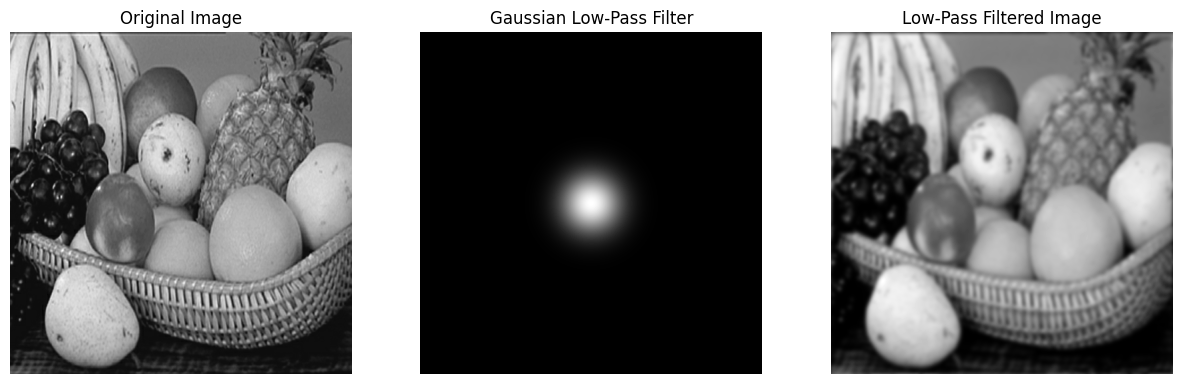

In [ ]:
image = cv2.imread('fruit.png', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency to center

# Create a Gaussian low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # center of the image
sigma = 30  # standard deviation for Gaussian, adjust for stronger or weaker filtering

x = np.arange(-ccol, ccol)
y = np.arange(-crow, crow)
x, y = np.meshgrid(x, y)
gaussian_filter = np.exp(- (x**2 + y**2) / (2 * sigma**2))

# Apply the Gaussian filter in the frequency domain
filtered_f_transform = f_transform_shifted * gaussian_filter

# Compute the inverse Fourier Transform to get the filtered image
filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)  # Shift back
filtered_image = np.fft.ifft2(filtered_f_transform_shifted)
filtered_image = np.abs(filtered_image)  # Take magnitude

# Plot the original image, Gaussian filter, and the filtered image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gaussian_filter, cmap='gray')
axes[1].set_title("Gaussian Low-Pass Filter")
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title("Low-Pass Filtered Image")
axes[2].axis('off')

plt.show()

# 4. High-Pass Filtering in the Frequency Domain

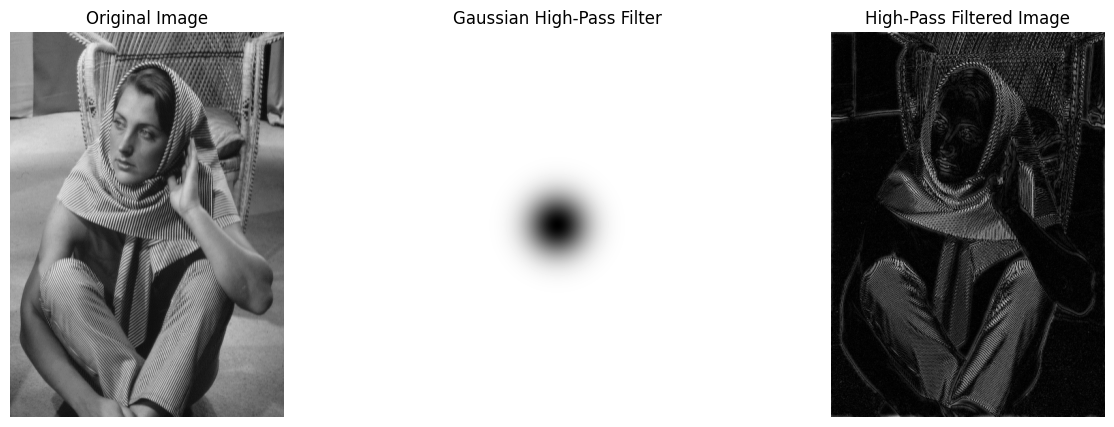

In [ ]:
image = cv2.imread('barbara.tif', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform and shift zero frequency to the center
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a Gaussian high-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # center of the image
sigma = 30  # standard deviation for Gaussian, adjust for stronger or weaker filtering

x = np.arange(-ccol, ccol)
y = np.arange(-crow, crow)
x, y = np.meshgrid(x, y)
gaussian_high_pass_filter = 1 - np.exp(- (x**2 + y**2) / (2 * sigma**2))

# Apply the Gaussian high-pass filter in the frequency domain
filtered_f_transform = f_transform_shifted * gaussian_high_pass_filter

# Compute the inverse Fourier Transform to get the filtered image
filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)  # Shift back
filtered_image = np.fft.ifft2(filtered_f_transform_shifted)
filtered_image = np.abs(filtered_image)  # Take magnitude

# Plot the original image, Gaussian high-pass filter, and the filtered image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gaussian_high_pass_filter, cmap='gray')
axes[1].set_title("Gaussian High-Pass Filter")
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title("High-Pass Filtered Image")
axes[2].axis('off')

plt.show()

# 4. Band-Pass Filtering in the Frequency Domain

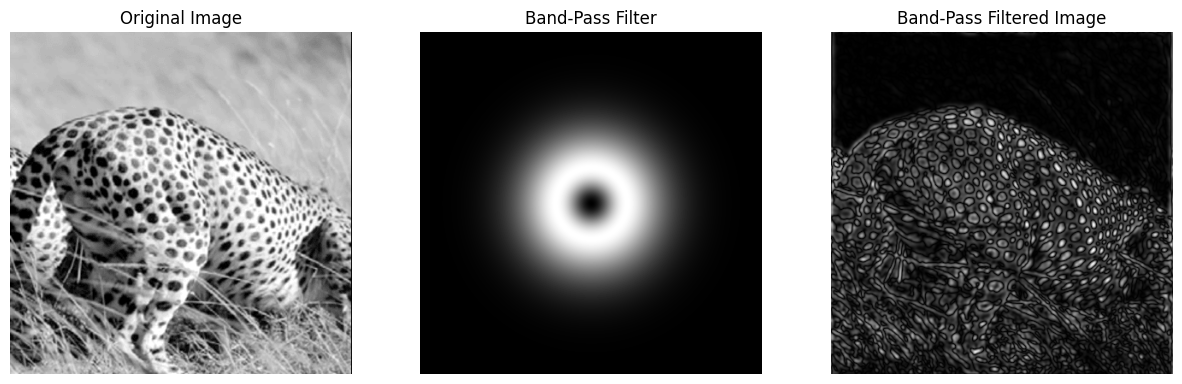

In [ ]:
image = cv2.imread('cheetah.png', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform and shift zero frequency to the center
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define the band-pass filter parameters
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # center of the image
low_sigma = 20  # inner radius of the band (cutoff for high frequencies)
high_sigma = 50  # outer radius of the band (cutoff for low frequencies)

# Create a band-pass filter
x = np.arange(-ccol, ccol)
y = np.arange(-crow, crow)
x, y = np.meshgrid(x, y)
distance_squared = x**2 + y**2

# Band-pass filter: only pass frequencies within the specified range
band_pass_filter = np.exp(-distance_squared / (2 * high_sigma**2)) - np.exp(-distance_squared / (2 * low_sigma**2))

# Apply the band-pass filter in the frequency domain
filtered_f_transform = f_transform_shifted * band_pass_filter

# Compute the inverse Fourier Transform to get the filtered image
filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)  # Shift back
filtered_image = np.fft.ifft2(filtered_f_transform_shifted)
filtered_image = np.abs(filtered_image)  # Take magnitude

# Plot the original image, band-pass filter, and the filtered image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(band_pass_filter, cmap='gray')
axes[1].set_title("Band-Pass Filter")
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title("Band-Pass Filtered Image")
axes[2].axis('off')

plt.show()

# 5. Amplitude vs. Phase Experiment

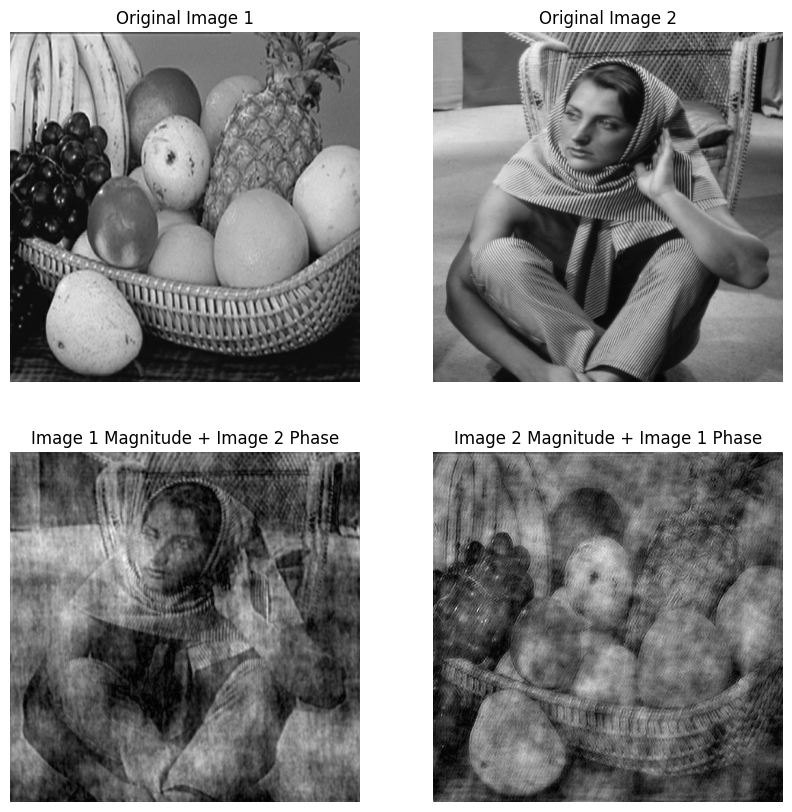

In [ ]:
# Load two images in grayscale
image1 = cv2.imread('fruit.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('barbara.tif', cv2.IMREAD_GRAYSCALE)

# Resize images to ensure they are the same size
image1 = cv2.resize(image1, (512, 512))
image2 = cv2.resize(image2, (512, 512))

# Compute the Fourier Transform of both images
f_transform1 = np.fft.fft2(image1)
f_transform2 = np.fft.fft2(image2)

# Shift zero frequency components to the center
f_transform1_shifted = np.fft.fftshift(f_transform1)
f_transform2_shifted = np.fft.fftshift(f_transform2)

# Get the magnitude and phase of each image
magnitude1, phase1 = np.abs(f_transform1_shifted), np.angle(f_transform1_shifted)
magnitude2, phase2 = np.abs(f_transform2_shifted), np.angle(f_transform2_shifted)

# Swap the phase and magnitude
# Image 1's magnitude with Image 2's phase
combined1 = magnitude1 * np.exp(1j * phase2)
# Image 2's magnitude with Image 1's phase
combined2 = magnitude2 * np.exp(1j * phase1)

# Inverse Fourier Transform to get the resulting images in the spatial domain
combined1_ifft = np.fft.ifft2(np.fft.ifftshift(combined1))
combined2_ifft = np.fft.ifft2(np.fft.ifftshift(combined2))

# Take the magnitude to obtain real values
combined_image1 = np.abs(combined1_ifft)
combined_image2 = np.abs(combined2_ifft)

# Plot the original images and the phase-magnitude swapped results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image1, cmap='gray')
axes[0, 0].set_title("Original Image 1")
axes[0, 0].axis('off')

axes[0, 1].imshow(image2, cmap='gray')
axes[0, 1].set_title("Original Image 2")
axes[0, 1].axis('off')

axes[1, 0].imshow(combined_image1, cmap='gray')
axes[1, 0].set_title("Image 1 Magnitude + Image 2 Phase")
axes[1, 0].axis('off')

axes[1, 1].imshow(combined_image2, cmap='gray')
axes[1, 1].set_title("Image 2 Magnitude + Image 1 Phase")
axes[1, 1].axis('off')

plt.show()


# 6. Convolution Theorem

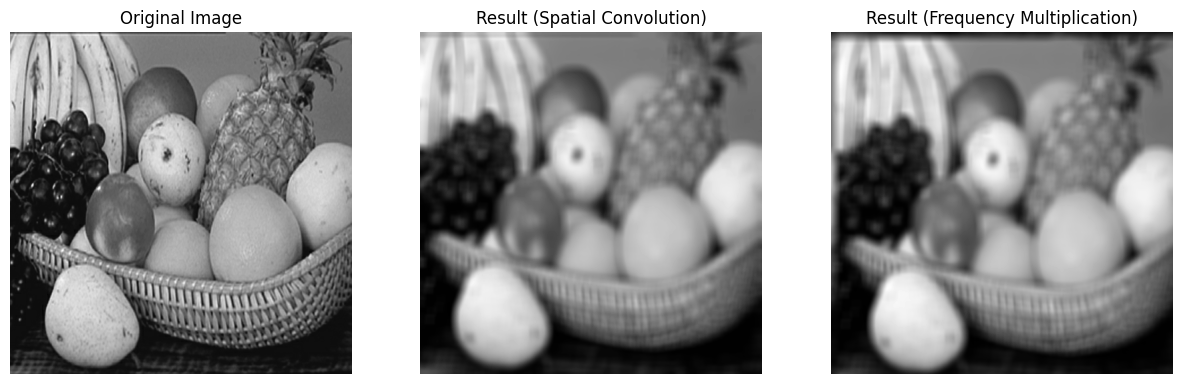

In [ ]:
# Load an image in grayscale
image = cv2.imread('fruit.png', cv2.IMREAD_GRAYSCALE)

# Define a simple averaging (box blur) kernel
kernel = np.ones((15, 15), np.float32) / 225  # 15x15 averaging kernel

# --- Convolution in Spatial Domain ---
# Apply the kernel directly using spatial convolution
spatial_result = cv2.filter2D(image, -1, kernel)

# --- Multiplication in Frequency Domain ---
# Compute Fourier Transform of both the image and kernel
f_transform_image = np.fft.fft2(image)
f_transform_kernel = np.fft.fft2(kernel, s=image.shape)  # Pad kernel to image size

# Shift zero frequency components to the center
f_transform_image_shifted = np.fft.fftshift(f_transform_image)
f_transform_kernel_shifted = np.fft.fftshift(f_transform_kernel)

# Multiply the Fourier transforms (equivalent to convolution in the spatial domain)
frequency_result_shifted = f_transform_image_shifted * f_transform_kernel_shifted

# Shift back and apply inverse Fourier Transform
frequency_result = np.fft.ifftshift(frequency_result_shifted)
frequency_result_image = np.fft.ifft2(frequency_result)
frequency_result_image = np.abs(frequency_result_image)  # Take magnitude

# Plot the original image, spatial domain result, and frequency domain result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(spatial_result, cmap='gray')
axes[1].set_title("Result (Spatial Convolution)")
axes[1].axis('off')

axes[2].imshow(frequency_result_image, cmap='gray')
axes[2].set_title("Result (Frequency Multiplication)")
axes[2].axis('off')

plt.show()
